In [1]:
import requests
getfolder=requests.get('https://www.bondora.com/marketing/media/LoanData.zip')

In [2]:
import zipfile,io
import pandas as pd 
import numpy as np
from matplotlib import pyplot
from sklearn.preprocessing import MinMaxScaler
from sklearn.tree import DecisionTreeClassifier, plot_tree
# Import label encoder
from sklearn import preprocessing

In [3]:
unzipfolder=zipfile.ZipFile(io.BytesIO(getfolder.content))
unzipfolder.open('LoanData.csv')

<zipfile.ZipExtFile name='LoanData.csv' mode='r' compress_type=deflate>

In [4]:
Zipcsvdf = pd.read_csv(unzipfolder.open('LoanData.csv'),engine="python")
Zipcsvdf.head()
date=Zipcsvdf['ReportAsOfEOD'].unique()

In [5]:
date

array(['2022-09-23'], dtype=object)

In [6]:
data1=Zipcsvdf[['Age','PartyId','Amount','LoanDuration','Country','Education','UseOfLoan','PrincipalPaymentsMade','IncomeFromPrincipalEmployer','EmploymentStatus','Gender','HomeOwnershipType','IncomeTotal','MonthlyPayment','InterestAndPenaltyBalance','MaritalStatus','NewCreditCustomer','NoOfPreviousLoansBeforeLoan','PreviousEarlyRepaymentsCountBeforeLoan','Status']]
data1

,Age,PartyId,Amount,LoanDuration,Country,Education,UseOfLoan,PrincipalPaymentsMade,IncomeFromPrincipalEmployer,EmploymentStatus,Gender,HomeOwnershipType,IncomeTotal,MonthlyPayment,InterestAndPenaltyBalance,MaritalStatus,NewCreditCustomer,NoOfPreviousLoansBeforeLoan,PreviousEarlyRepaymentsCountBeforeLoan,Status
0,27,{1AD71AF0-8240-4700-B602-ADA90177DD8C},3189.0,60,EE,3.0,-1,0.00,0.0,-1.0,1.0,10.0,900.0,115.34,0.00,-1.0,False,1.0,0.0,Current
1,53,{EBF05573-554D-4A3B-BC77-A2CF00B7D110},2125.0,60,EE,4.0,2,999.70,0.0,6.0,1.0,1.0,354.0,62.05,507.21,2.0,False,1.0,0.0,Late
2,25,{F6507F91-F992-41FA-BB4C-AC37009B3E58},531.0,60,EE,1.0,-1,19.84,0.0,-1.0,0.0,1.0,947.0,16.67,0.00,-1.0,False,8.0,0.0,Current
3,50,{46C6CBA4-0FBE-44AD-9304-A3EF0111A5FB},3000.0,60,EE,5.0,3,729.87,900.0,5.0,1.0,1.0,900.0,84.75,2429.70,2.0,False,1.0,1.0,Repaid
4,44,{CA64DA9B-8E95-450E-9EFE-A58601016DB2},9100.0,60,EE,4.0,3,6537.00,600.0,5.0,0.0,8.0,1200.0,268.57,0.00,4.0,True,0.0,0.0,Repaid
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
255018,58,{2513C653-4D23-4F77-9D00-A4F200CDC2B3},3000.0,60,EE,3.0,6,3000.00,350.0,3.0,1.0,1.0,350.0,88.71,0.00,1.0,True,0.0,0.0,Repaid
255019,64,{B731A410-81A9-4929-AD3F-A05000FEFBDB},1300.0,48,EE,4.0,6,475.78,557.0,4.0,0.0,1.0,867.0,41.42,0.00,1.0,False,4.0,2.0,Repaid
255020,52,{B28536DD-51E0-45B0-96DE-9D7E00C0AC6D},531.0,60,EE,1.0,-1,11.92,0.0,-1.0,1.0,1.0,400.0,14.53,NaN,-1.0,False,1.0,0.0,Current
255021,38,{13148889-E29D-4661-8AEC-A43600BC8177},531.0,60,EE,4.0,-1,34.26,0.0,-1.0,1.0,1.0,900.0,14.44,NaN,-1.0,False,5.0,0.0,Current


In [7]:
#some category's labels have - signe so we use np.abs to convert negatives values to positives
data1[['Education','EmploymentStatus','Gender','UseOfLoan','HomeOwnershipType','MaritalStatus']]=np.abs(data1[['Education','EmploymentStatus','Gender','UseOfLoan','HomeOwnershipType','MaritalStatus']])
data1

C:\Users\34602\anaconda3\lib\site-packages\pandas\core\frame.py:3641: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


,Age,PartyId,Amount,LoanDuration,Country,Education,UseOfLoan,PrincipalPaymentsMade,IncomeFromPrincipalEmployer,EmploymentStatus,Gender,HomeOwnershipType,IncomeTotal,MonthlyPayment,InterestAndPenaltyBalance,MaritalStatus,NewCreditCustomer,NoOfPreviousLoansBeforeLoan,PreviousEarlyRepaymentsCountBeforeLoan,Status
0,27,{1AD71AF0-8240-4700-B602-ADA90177DD8C},3189.0,60,EE,3.0,1,0.00,0.0,1.0,1.0,10.0,900.0,115.34,0.00,1.0,False,1.0,0.0,Current
1,53,{EBF05573-554D-4A3B-BC77-A2CF00B7D110},2125.0,60,EE,4.0,2,999.70,0.0,6.0,1.0,1.0,354.0,62.05,507.21,2.0,False,1.0,0.0,Late
2,25,{F6507F91-F992-41FA-BB4C-AC37009B3E58},531.0,60,EE,1.0,1,19.84,0.0,1.0,0.0,1.0,947.0,16.67,0.00,1.0,False,8.0,0.0,Current
3,50,{46C6CBA4-0FBE-44AD-9304-A3EF0111A5FB},3000.0,60,EE,5.0,3,729.87,900.0,5.0,1.0,1.0,900.0,84.75,2429.70,2.0,False,1.0,1.0,Repaid
4,44,{CA64DA9B-8E95-450E-9EFE-A58601016DB2},9100.0,60,EE,4.0,3,6537.00,600.0,5.0,0.0,8.0,1200.0,268.57,0.00,4.0,True,0.0,0.0,Repaid
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
255018,58,{2513C653-4D23-4F77-9D00-A4F200CDC2B3},3000.0,60,EE,3.0,6,3000.00,350.0,3.0,1.0,1.0,350.0,88.71,0.00,1.0,True,0.0,0.0,Repaid
255019,64,{B731A410-81A9-4929-AD3F-A05000FEFBDB},1300.0,48,EE,4.0,6,475.78,557.0,4.0,0.0,1.0,867.0,41.42,0.00,1.0,False,4.0,2.0,Repaid
255020,52,{B28536DD-51E0-45B0-96DE-9D7E00C0AC6D},531.0,60,EE,1.0,1,11.92,0.0,1.0,1.0,1.0,400.0,14.53,NaN,1.0,False,1.0,0.0,Current
255021,38,{13148889-E29D-4661-8AEC-A43600BC8177},531.0,60,EE,4.0,1,34.26,0.0,1.0,1.0,1.0,900.0,14.44,NaN,1.0,False,5.0,0.0,Current


In [8]:
#check if the data are balance 
countDF=data1[data1['Status']=='Repaid']['Status'].count()
countDF1=data1[data1['Status']=='Late']['Status'].count()
print(countDF1)
print(countDF)

75148
91375


In [9]:
#drop loan that still in progress
data2=data1[((data1['Status']=='Late') | (data1['Status']=='Repaid'))].copy()
data2

,Age,PartyId,Amount,LoanDuration,Country,Education,UseOfLoan,PrincipalPaymentsMade,IncomeFromPrincipalEmployer,EmploymentStatus,Gender,HomeOwnershipType,IncomeTotal,MonthlyPayment,InterestAndPenaltyBalance,MaritalStatus,NewCreditCustomer,NoOfPreviousLoansBeforeLoan,PreviousEarlyRepaymentsCountBeforeLoan,Status
1,53,{EBF05573-554D-4A3B-BC77-A2CF00B7D110},2125.0,60,EE,4.0,2,999.70,0.0,6.0,1.0,1.0,354.0,62.05,507.21,2.0,False,1.0,0.0,Late
3,50,{46C6CBA4-0FBE-44AD-9304-A3EF0111A5FB},3000.0,60,EE,5.0,3,729.87,900.0,5.0,1.0,1.0,900.0,84.75,2429.70,2.0,False,1.0,1.0,Repaid
4,44,{CA64DA9B-8E95-450E-9EFE-A58601016DB2},9100.0,60,EE,4.0,3,6537.00,600.0,5.0,0.0,8.0,1200.0,268.57,0.00,4.0,True,0.0,0.0,Repaid
5,42,{F08F654D-DB2E-4C4B-8C90-A46100FCE7B6},1500.0,60,ES,2.0,2,464.73,863.0,3.0,0.0,2.0,863.0,63.53,2972.09,1.0,True,0.0,1.0,Late
6,34,{DAFC5C08-8201-4654-9D06-A56D00084659},1090.0,48,ES,4.0,7,0.01,0.0,6.0,1.0,3.0,697.0,101.19,4461.78,4.0,True,0.0,0.0,Late
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
255014,38,{302F94E7-64CB-4BD4-A2E4-A43001129494},2000.0,60,FI,3.0,6,0.00,1500.0,3.0,1.0,3.0,2300.0,76.11,4284.86,1.0,True,0.0,0.0,Late
255015,37,{F6CBE499-95EA-467A-B930-A3CD00B3A1CA},7440.0,60,FI,4.0,0,7440.00,2172.0,3.0,0.0,4.0,2172.0,232.40,0.00,3.0,False,2.0,0.0,Repaid
255017,37,{289CB355-E120-4365-9052-A3120148A7B1},1485.0,60,ES,3.0,7,1485.00,1550.0,3.0,0.0,8.0,1550.0,93.08,0.00,3.0,False,3.0,1.0,Repaid
255018,58,{2513C653-4D23-4F77-9D00-A4F200CDC2B3},3000.0,60,EE,3.0,6,3000.00,350.0,3.0,1.0,1.0,350.0,88.71,0.00,1.0,True,0.0,0.0,Repaid


In [10]:
data2.isnull().sum()

Age                                           0
PartyId                                       0
Amount                                        0
LoanDuration                                  0
Country                                       0
Education                                    50
UseOfLoan                                     0
PrincipalPaymentsMade                         0
IncomeFromPrincipalEmployer                   0
EmploymentStatus                            202
Gender                                       45
HomeOwnershipType                          1657
IncomeTotal                                   0
MonthlyPayment                             6671
InterestAndPenaltyBalance                 25814
MaritalStatus                                50
NewCreditCustomer                             0
NoOfPreviousLoansBeforeLoan                   8
PreviousEarlyRepaymentsCountBeforeLoan        8
Status                                        0
dtype: int64

In [11]:
(data2.isnull().sum()/data2.shape[0]).sum()

0.20720861382511724

In [12]:
#replace Intrest and penalty that still not payed null value  by 0 when the borrower haven't get a loan before 
data2['InterestAndPenaltyBalance'][(data2['InterestAndPenaltyBalance'].isnull()) & (data2['NewCreditCustomer']==True)]=0

C:\Users\34602\AppData\Local\Temp/ipykernel_16468/3412816382.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data2['InterestAndPenaltyBalance'][(data2['InterestAndPenaltyBalance'].isnull()) & (data2['NewCreditCustomer']==True)]=0


In [13]:
#replace NoOfPreviousLoansBeforeLoan et PreviousEarlyRepaymentsCountBeforeLoan null value  by 0 when the borrower haven't get a loan before 
data2['NoOfPreviousLoansBeforeLoan'][(data2['NoOfPreviousLoansBeforeLoan'].isnull()) & (data2['NewCreditCustomer']==True)]=0
data2['PreviousEarlyRepaymentsCountBeforeLoan'][(data2['PreviousEarlyRepaymentsCountBeforeLoan'].isnull()) & (data2['NewCreditCustomer']==True)]=0

C:\Users\34602\AppData\Local\Temp/ipykernel_16468/781707990.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data2['NoOfPreviousLoansBeforeLoan'][(data2['NoOfPreviousLoansBeforeLoan'].isnull()) & (data2['NewCreditCustomer']==True)]=0
C:\Users\34602\AppData\Local\Temp/ipykernel_16468/781707990.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data2['PreviousEarlyRepaymentsCountBeforeLoan'][(data2['PreviousEarlyRepaymentsCountBeforeLoan'].isnull()) & (data2['NewCreditCustomer']==True)]=0


In [14]:
#replace Intrest and penalty that still not payed null value  by 0 when the borrower haven't get a loan before 
#data2['EmploymentDurationCurrentEmployer'][(data2['EmploymentDurationCurrentEmployer'].isnull()) & (data2['EmploymentStatus']==1)]='Other'

In [15]:
#replace  employement status null value by 0 when income from principal employer is 0 
data2['EmploymentStatus'][(data2['EmploymentStatus'].isnull()) & (data2['IncomeFromPrincipalEmployer']==0)]=1

C:\Users\34602\AppData\Local\Temp/ipykernel_16468/3235822939.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data2['EmploymentStatus'][(data2['EmploymentStatus'].isnull()) & (data2['IncomeFromPrincipalEmployer']==0)]=1


In [16]:
#calculate Monthly payment if it's null
data2['MonthlyPayment'][(data2['MonthlyPayment'].isnull())]=data2['IncomeTotal'][(data2['MonthlyPayment'].isnull())]/data2['LoanDuration'][(data2['MonthlyPayment'].isnull())]

C:\Users\34602\AppData\Local\Temp/ipykernel_16468/1720972214.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data2['MonthlyPayment'][(data2['MonthlyPayment'].isnull())]=data2['IncomeTotal'][(data2['MonthlyPayment'].isnull())]/data2['LoanDuration'][(data2['MonthlyPayment'].isnull())]


In [17]:
#select every borrower Education Status if it exist to replace  Education status null value in the loan informations
borrowersEducation=data1[['PartyId','Education']].dropna()
borrowersEducation=borrowersEducation[['PartyId','Education']].drop_duplicates()
borrowersEducation=borrowersEducation[['PartyId','Education']].drop_duplicates(subset=["PartyId"],keep='last')
len(borrowersEducation["PartyId"].unique())

115817

In [18]:
data4=data2.copy()
data2.isnull().sum()

Age                                           0
PartyId                                       0
Amount                                        0
LoanDuration                                  0
Country                                       0
Education                                    50
UseOfLoan                                     0
PrincipalPaymentsMade                         0
IncomeFromPrincipalEmployer                   0
EmploymentStatus                            107
Gender                                       45
HomeOwnershipType                          1657
IncomeTotal                                   0
MonthlyPayment                                0
InterestAndPenaltyBalance                 10298
MaritalStatus                                50
NewCreditCustomer                             0
NoOfPreviousLoansBeforeLoan                   3
PreviousEarlyRepaymentsCountBeforeLoan        3
Status                                        0
dtype: int64

In [19]:
#use borrowers education status dataFrame to replace null value if it exist
d=pd.merge(data4[(data4['Education'].isnull())].drop('Education',axis=1),borrowersEducation,how='inner',on='PartyId').drop_duplicates()
d

,Age,PartyId,Amount,LoanDuration,Country,UseOfLoan,PrincipalPaymentsMade,IncomeFromPrincipalEmployer,EmploymentStatus,Gender,HomeOwnershipType,IncomeTotal,MonthlyPayment,InterestAndPenaltyBalance,MaritalStatus,NewCreditCustomer,NoOfPreviousLoansBeforeLoan,PreviousEarlyRepaymentsCountBeforeLoan,Status,Education
0,0,{F2BD2058-156B-48F2-861C-9D2500AADF0D},159.7781,9,EE,102,49.5181,0.0,1.0,NaN,NaN,0.0,0.0,0.0,NaN,True,0.0,0.0,Repaid,0.0
1,0,{F2BD2058-156B-48F2-861C-9D2500AADF0D},191.7300,9,EE,110,0.0300,0.0,1.0,NaN,NaN,0.0,0.0,0.0,NaN,True,2.0,0.0,Repaid,0.0
2,0,{F2BD2058-156B-48F2-861C-9D2500AADF0D},127.8300,12,EE,110,0.0700,0.0,1.0,NaN,NaN,0.0,0.0,0.0,NaN,True,3.0,0.0,Repaid,0.0
3,0,{F2BD2058-156B-48F2-861C-9D2500AADF0D},102.2600,1,EE,102,0.0100,0.0,1.0,NaN,NaN,0.0,0.0,0.0,NaN,True,4.0,0.0,Repaid,0.0
4,0,{F2BD2058-156B-48F2-861C-9D2500AADF0D},313.1400,12,EE,102,0.0100,0.0,1.0,NaN,NaN,0.0,0.0,0.0,NaN,True,5.0,0.0,Repaid,0.0
5,0,{F2BD2058-156B-48F2-861C-9D2500AADF0D},223.6800,12,EE,102,0.0000,0.0,1.0,NaN,NaN,0.0,0.0,0.0,NaN,True,6.0,0.0,Repaid,0.0
6,0,{F2BD2058-156B-48F2-861C-9D2500AADF0D},83.0800,12,EE,110,0.0000,0.0,1.0,NaN,NaN,0.0,0.0,0.0,NaN,True,7.0,0.0,Repaid,0.0
7,0,{F2BD2058-156B-48F2-861C-9D2500AADF0D},115.0300,12,EE,110,0.0000,0.0,1.0,NaN,NaN,0.0,0.0,0.0,NaN,True,9.0,0.0,Repaid,0.0
8,0,{F2BD2058-156B-48F2-861C-9D2500AADF0D},134.2200,3,EE,102,0.0000,0.0,1.0,NaN,NaN,0.0,0.0,0.0,NaN,True,10.0,0.0,Repaid,0.0
9,0,{25043AF8-869E-4D1D-9993-9D4500D931B6},1316.6342,12,EE,102,1.1342,0.0,1.0,NaN,NaN,0.0,0.0,0.0,NaN,True,0.0,0.0,Repaid,0.0


In [20]:
data2.loc[(data2['Education'].isnull()) & (data2['PartyId'].isin(d['PartyId'])),'Education']=d['Education'].values.tolist()


In [21]:
data2.isnull().sum()

Age                                           0
PartyId                                       0
Amount                                        0
LoanDuration                                  0
Country                                       0
Education                                    32
UseOfLoan                                     0
PrincipalPaymentsMade                         0
IncomeFromPrincipalEmployer                   0
EmploymentStatus                            107
Gender                                       45
HomeOwnershipType                          1657
IncomeTotal                                   0
MonthlyPayment                                0
InterestAndPenaltyBalance                 10298
MaritalStatus                                50
NewCreditCustomer                             0
NoOfPreviousLoansBeforeLoan                   3
PreviousEarlyRepaymentsCountBeforeLoan        3
Status                                        0
dtype: int64

In [22]:
data2['NewCreditCustomer'].value_counts()

True     98683
False    67840
Name: NewCreditCustomer, dtype: int64

In [23]:
#select every borrower EmploymentStatus if it exist to replace  EmploymentStatus null value in the loan informations
borrowersEmploymentStatus=data1[['PartyId','EmploymentStatus']].dropna()
borrowersEmploymentStatus=borrowersEmploymentStatus[['PartyId','EmploymentStatus']].drop_duplicates()
borrowersEmploymentStatus=borrowersEmploymentStatus[['PartyId','EmploymentStatus']].drop_duplicates(subset=["PartyId"],keep='last')
borrowersEmploymentStatus.count()

PartyId             115777
EmploymentStatus    115777
dtype: int64

In [24]:
#use borrowers EmploymentStatus dataFrame to replace null value if it exist
d1=pd.merge(borrowersEmploymentStatus,data4[(data4['EmploymentStatus'].isnull())].drop('EmploymentStatus',axis=1),how='inner',on='PartyId').drop_duplicates()
d1

,PartyId,EmploymentStatus,Age,Amount,LoanDuration,Country,Education,UseOfLoan,PrincipalPaymentsMade,IncomeFromPrincipalEmployer,Gender,HomeOwnershipType,IncomeTotal,MonthlyPayment,InterestAndPenaltyBalance,MaritalStatus,NewCreditCustomer,NoOfPreviousLoansBeforeLoan,PreviousEarlyRepaymentsCountBeforeLoan,Status
0,{4795E701-7759-4FC8-8802-9BD10149713C},3.0,36,12.7789,3,EE,5.0,7,4.1489,6000.0,0.0,NaN,10200.0,3400.000000,55.73,1.0,True,1.0,0.0,Late
1,{4795E701-7759-4FC8-8802-9BD10149713C},3.0,36,31.9604,3,EE,5.0,7,0.3904,6000.0,0.0,NaN,10200.0,3400.000000,204.55,1.0,True,2.0,0.0,Late
2,{58424B87-B621-44AD-AB62-9BBF00D9797F},3.0,32,95.8581,12,EE,2.0,7,95.8581,8000.0,1.0,NaN,8300.0,691.666667,0.00,3.0,False,4.0,0.0,Repaid
3,{2BE512D4-DFF8-4706-BEE0-9BB900D0EC68},3.0,54,178.9532,12,EE,4.0,0,178.9532,16318.0,1.0,NaN,17318.0,1443.166667,0.00,1.0,True,1.0,0.0,Repaid
4,{1F0D4748-F925-4649-842C-9C0A00DD5B42},3.0,23,63.9118,15,EE,2.0,0,63.9118,11000.0,1.0,NaN,11600.0,773.333333,0.00,3.0,True,2.0,0.0,Repaid
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69,{383D15CA-594C-4449-B2E1-A234012B3615},1.0,27,1500.0000,18,EE,5.0,0,1500.0000,511.0,0.0,1.0,511.0,28.388889,0.00,2.0,True,0.0,0.0,Repaid
70,{03C456B3-EDC1-4050-B543-9C4D00E78923},1.0,18,95.8677,10,EE,2.0,4,95.8677,5000.0,0.0,NaN,6000.0,600.000000,0.00,2.0,True,0.0,0.0,Repaid
71,{4853F3E9-1630-44A8-A59B-A25100AC51E5},1.0,49,6100.0000,60,EE,5.0,0,5136.8300,700.0,1.0,8.0,700.0,11.666667,0.00,5.0,True,0.0,0.0,Repaid
72,{DB0CF86E-7C79-4294-BD28-9D3400CA7516},1.0,25,223.6908,1,EE,4.0,7,223.6908,3300.0,1.0,NaN,3900.0,3900.000000,0.00,2.0,True,0.0,0.0,Repaid


In [25]:
data2.loc[(data2['EmploymentStatus'].isnull()) & (data2['PartyId'].isin(d1['PartyId'])),'EmploymentStatus']=d1['EmploymentStatus'].values.tolist()

In [26]:
data2.isnull().sum()

Age                                           0
PartyId                                       0
Amount                                        0
LoanDuration                                  0
Country                                       0
Education                                    32
UseOfLoan                                     0
PrincipalPaymentsMade                         0
IncomeFromPrincipalEmployer                   0
EmploymentStatus                             33
Gender                                       45
HomeOwnershipType                          1657
IncomeTotal                                   0
MonthlyPayment                                0
InterestAndPenaltyBalance                 10298
MaritalStatus                                50
NewCreditCustomer                             0
NoOfPreviousLoansBeforeLoan                   3
PreviousEarlyRepaymentsCountBeforeLoan        3
Status                                        0
dtype: int64

In [27]:
#select every borrower Gender if it exist to replace  Gender null value in the loan informations
borrowersGender=data1[['PartyId','Gender']].dropna()
borrowersGender=borrowersGender[['PartyId','Gender']].drop_duplicates()
borrowersGender=borrowersGender[['PartyId','Gender']].drop_duplicates(subset=["PartyId"],keep='last')
borrowersGender.count()

PartyId    115817
Gender     115817
dtype: int64

In [28]:
#use borrowers Gender dataFrame to replace null value if it exist
d2=pd.merge(borrowersGender,data4[(data4['Gender'].isnull())].drop('Gender',axis=1),how='inner',on='PartyId').drop_duplicates()
d2

,PartyId,Gender,Age,Amount,LoanDuration,Country,Education,UseOfLoan,PrincipalPaymentsMade,IncomeFromPrincipalEmployer,EmploymentStatus,HomeOwnershipType,IncomeTotal,MonthlyPayment,InterestAndPenaltyBalance,MaritalStatus,NewCreditCustomer,NoOfPreviousLoansBeforeLoan,PreviousEarlyRepaymentsCountBeforeLoan,Status
0,{F2BD2058-156B-48F2-861C-9D2500AADF0D},0.0,0,159.7781,9,EE,NaN,102,49.5181,0.0,1.0,NaN,0.0,0.0,0.0,NaN,True,0.0,0.0,Repaid
1,{F2BD2058-156B-48F2-861C-9D2500AADF0D},0.0,0,191.7300,9,EE,NaN,110,0.0300,0.0,1.0,NaN,0.0,0.0,0.0,NaN,True,2.0,0.0,Repaid
2,{F2BD2058-156B-48F2-861C-9D2500AADF0D},0.0,0,127.8300,12,EE,NaN,110,0.0700,0.0,1.0,NaN,0.0,0.0,0.0,NaN,True,3.0,0.0,Repaid
3,{F2BD2058-156B-48F2-861C-9D2500AADF0D},0.0,0,102.2600,1,EE,NaN,102,0.0100,0.0,1.0,NaN,0.0,0.0,0.0,NaN,True,4.0,0.0,Repaid
4,{F2BD2058-156B-48F2-861C-9D2500AADF0D},0.0,0,313.1400,12,EE,NaN,102,0.0100,0.0,1.0,NaN,0.0,0.0,0.0,NaN,True,5.0,0.0,Repaid
5,{F2BD2058-156B-48F2-861C-9D2500AADF0D},0.0,0,223.6800,12,EE,NaN,102,0.0000,0.0,1.0,NaN,0.0,0.0,0.0,NaN,True,6.0,0.0,Repaid
6,{F2BD2058-156B-48F2-861C-9D2500AADF0D},0.0,0,83.0800,12,EE,NaN,110,0.0000,0.0,1.0,NaN,0.0,0.0,0.0,NaN,True,7.0,0.0,Repaid
7,{F2BD2058-156B-48F2-861C-9D2500AADF0D},0.0,0,115.0300,12,EE,NaN,110,0.0000,0.0,1.0,NaN,0.0,0.0,0.0,NaN,True,9.0,0.0,Repaid
8,{F2BD2058-156B-48F2-861C-9D2500AADF0D},0.0,0,134.2200,3,EE,NaN,102,0.0000,0.0,1.0,NaN,0.0,0.0,0.0,NaN,True,10.0,0.0,Repaid
9,{25043AF8-869E-4D1D-9993-9D4500D931B6},0.0,0,1316.6342,12,EE,NaN,102,1.1342,0.0,1.0,NaN,0.0,0.0,0.0,NaN,True,0.0,0.0,Repaid


In [29]:
data2.loc[(data2['Gender'].isnull()) & (data2['PartyId'].isin(d2['PartyId'])),'Gender']=d2['Gender'].values.tolist()


In [30]:
data2.isnull().sum()

Age                                           0
PartyId                                       0
Amount                                        0
LoanDuration                                  0
Country                                       0
Education                                    32
UseOfLoan                                     0
PrincipalPaymentsMade                         0
IncomeFromPrincipalEmployer                   0
EmploymentStatus                             33
Gender                                       32
HomeOwnershipType                          1657
IncomeTotal                                   0
MonthlyPayment                                0
InterestAndPenaltyBalance                 10298
MaritalStatus                                50
NewCreditCustomer                             0
NoOfPreviousLoansBeforeLoan                   3
PreviousEarlyRepaymentsCountBeforeLoan        3
Status                                        0
dtype: int64

In [31]:
#select every borrower HomeOwnershipType if it exist to replace  Gender null value in the loan informations
borrowersHomeOwnershipType=data1[['PartyId','HomeOwnershipType']].dropna()
borrowersHomeOwnershipType=borrowersHomeOwnershipType[['PartyId','HomeOwnershipType']].drop_duplicates()
borrowersHomeOwnershipType=borrowersHomeOwnershipType[['PartyId','HomeOwnershipType']].drop_duplicates(subset=["PartyId"],keep='last')
borrowersHomeOwnershipType.count()

PartyId              115491
HomeOwnershipType    115491
dtype: int64

In [32]:
#use borrowers HomeOwnershipType dataFrame to replace null value if it exist
d3=pd.merge(borrowersHomeOwnershipType,data4[(data4['HomeOwnershipType'].isnull())].drop('HomeOwnershipType',axis=1),how='inner',on='PartyId').drop_duplicates()
d3

,PartyId,HomeOwnershipType,Age,Amount,LoanDuration,Country,Education,UseOfLoan,PrincipalPaymentsMade,IncomeFromPrincipalEmployer,EmploymentStatus,Gender,IncomeTotal,MonthlyPayment,InterestAndPenaltyBalance,MaritalStatus,NewCreditCustomer,NoOfPreviousLoansBeforeLoan,PreviousEarlyRepaymentsCountBeforeLoan,Status
0,{1700872C-AB88-4546-B0EF-9BCB00288A99},0.0,19,89.4700,4,EE,2.0,8,58.1700,7000.0,3.0,0.0,12000.0,3000.000000,725.50,2.0,True,2.0,0.0,Repaid
1,{1700872C-AB88-4546-B0EF-9BCB00288A99},0.0,19,38.3500,2,EE,2.0,7,24.9300,7200.0,3.0,0.0,8700.0,4350.000000,314.56,2.0,True,4.0,0.0,Repaid
2,{1700872C-AB88-4546-B0EF-9BCB00288A99},0.0,19,25.5600,2,EE,2.0,7,16.6100,7200.0,3.0,0.0,8700.0,4350.000000,208.20,2.0,True,5.0,0.0,Repaid
3,{4795E701-7759-4FC8-8802-9BD10149713C},0.0,36,12.7789,3,EE,5.0,7,4.1489,6000.0,NaN,0.0,10200.0,3400.000000,55.73,1.0,True,1.0,0.0,Late
4,{4795E701-7759-4FC8-8802-9BD10149713C},0.0,36,31.9604,3,EE,5.0,7,0.3904,6000.0,NaN,0.0,10200.0,3400.000000,204.55,1.0,True,2.0,0.0,Late
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
879,{26FBDC1C-D4D1-4B23-9142-9D1400DC9F0B},1.0,26,287.6124,12,EE,3.0,7,287.6124,3000.0,2.0,0.0,4000.0,333.333333,0.00,3.0,False,4.0,0.0,Repaid
880,{CC6D7532-1970-4C1F-9F24-9CFD00D26084},0.0,22,159.7788,9,EE,3.0,7,159.7788,18000.0,2.0,0.0,20000.0,2222.222222,0.00,2.0,True,0.0,0.0,Repaid
881,{CC6D7532-1970-4C1F-9F24-9CFD00D26084},0.0,22,44.7262,24,EE,4.0,1,44.7262,18000.0,2.0,0.0,20000.0,833.333333,0.00,2.0,True,1.0,0.0,Repaid
882,{CC6D7532-1970-4C1F-9F24-9CFD00D26084},0.0,22,31.9382,24,EE,1.0,7,31.9382,18000.0,2.0,0.0,20000.0,833.333333,0.00,1.0,True,2.0,0.0,Repaid


In [33]:
data2.loc[(data2['HomeOwnershipType'].isnull()) & (data2['PartyId'].isin(d3['PartyId'])),'HomeOwnershipType']=d3['HomeOwnershipType'].values.tolist()

In [34]:
#select every borrower MaritalStatus if it exist to replace  MaritalStatus null value in the loan informations
borrowersMaritalStatus=data1[['PartyId','MaritalStatus']].dropna()
borrowersMaritalStatus=borrowersMaritalStatus[['PartyId','MaritalStatus']].drop_duplicates()
borrowersMaritalStatus=borrowersMaritalStatus[['PartyId','MaritalStatus']].drop_duplicates(subset=["PartyId"],keep='last')
borrowersMaritalStatus.count()

PartyId          115817
MaritalStatus    115817
dtype: int64

In [35]:
#use borrowers MaritalStatus dataFrame to replace null value if it exist
d4=pd.merge(borrowersMaritalStatus,data2[(data2['MaritalStatus'].isnull())].drop('MaritalStatus',axis=1),how='inner',on='PartyId').drop_duplicates()
d4

,PartyId,MaritalStatus,Age,Amount,LoanDuration,Country,Education,UseOfLoan,PrincipalPaymentsMade,IncomeFromPrincipalEmployer,EmploymentStatus,Gender,HomeOwnershipType,IncomeTotal,MonthlyPayment,InterestAndPenaltyBalance,NewCreditCustomer,NoOfPreviousLoansBeforeLoan,PreviousEarlyRepaymentsCountBeforeLoan,Status
0,{F2BD2058-156B-48F2-861C-9D2500AADF0D},0.0,0,159.7781,9,EE,0.0,102,49.5181,0.0,1.0,0.0,8.0,0.0,0.0,0.0,True,0.0,0.0,Repaid
1,{F2BD2058-156B-48F2-861C-9D2500AADF0D},0.0,0,191.7300,9,EE,0.0,110,0.0300,0.0,1.0,0.0,8.0,0.0,0.0,0.0,True,2.0,0.0,Repaid
2,{F2BD2058-156B-48F2-861C-9D2500AADF0D},0.0,0,127.8300,12,EE,0.0,110,0.0700,0.0,1.0,0.0,8.0,0.0,0.0,0.0,True,3.0,0.0,Repaid
3,{F2BD2058-156B-48F2-861C-9D2500AADF0D},0.0,0,102.2600,1,EE,0.0,102,0.0100,0.0,1.0,0.0,7.0,0.0,0.0,0.0,True,4.0,0.0,Repaid
4,{F2BD2058-156B-48F2-861C-9D2500AADF0D},0.0,0,313.1400,12,EE,0.0,102,0.0100,0.0,1.0,0.0,0.0,0.0,0.0,0.0,True,5.0,0.0,Repaid
5,{F2BD2058-156B-48F2-861C-9D2500AADF0D},0.0,0,223.6800,12,EE,0.0,102,0.0000,0.0,1.0,0.0,8.0,0.0,0.0,0.0,True,6.0,0.0,Repaid
6,{F2BD2058-156B-48F2-861C-9D2500AADF0D},0.0,0,83.0800,12,EE,0.0,110,0.0000,0.0,1.0,0.0,6.0,0.0,0.0,0.0,True,7.0,0.0,Repaid
7,{F2BD2058-156B-48F2-861C-9D2500AADF0D},0.0,0,115.0300,12,EE,0.0,110,0.0000,0.0,1.0,0.0,8.0,0.0,0.0,0.0,True,9.0,0.0,Repaid
8,{F2BD2058-156B-48F2-861C-9D2500AADF0D},0.0,0,134.2200,3,EE,0.0,102,0.0000,0.0,1.0,0.0,3.0,0.0,0.0,0.0,True,10.0,0.0,Repaid
9,{25043AF8-869E-4D1D-9993-9D4500D931B6},0.0,0,1316.6342,12,EE,0.0,102,1.1342,0.0,1.0,0.0,7.0,0.0,0.0,0.0,True,0.0,0.0,Repaid


In [36]:
data2.loc[(data2['MaritalStatus'].isnull()) & (data2['PartyId'].isin(d4['PartyId'])),'MaritalStatus']=d4['MaritalStatus'].values.tolist()

In [37]:
#even after replacing NrOfDependants null value by existing information in our data it still 100000 null value which is is 66% of our data so we drop this colonne
#data2=data2.drop('NrOfDependants',axis=1)

In [38]:
data2.isnull().sum()

Age                                           0
PartyId                                       0
Amount                                        0
LoanDuration                                  0
Country                                       0
Education                                    32
UseOfLoan                                     0
PrincipalPaymentsMade                         0
IncomeFromPrincipalEmployer                   0
EmploymentStatus                             33
Gender                                       32
HomeOwnershipType                           773
IncomeTotal                                   0
MonthlyPayment                                0
InterestAndPenaltyBalance                 10298
MaritalStatus                                32
NewCreditCustomer                             0
NoOfPreviousLoansBeforeLoan                   3
PreviousEarlyRepaymentsCountBeforeLoan        3
Status                                        0
dtype: int64

In [39]:
(data2.isnull().sum()/data2.shape[0]).sum()

0.06729400743440847

In [40]:
data2[data2['PreviousEarlyRepaymentsCountBeforeLoan']>data2['NoOfPreviousLoansBeforeLoan']].shape[0]

2418

In [41]:
keep_value=data2[['PreviousEarlyRepaymentsCountBeforeLoan','NoOfPreviousLoansBeforeLoan']]
[data2['PreviousEarlyRepaymentsCountBeforeLoan']>data2['NoOfPreviousLoansBeforeLoan']].copy()

[1         False
 3         False
 4         False
 5          True
 6         False
           ...  
 255014    False
 255015    False
 255017    False
 255018    False
 255019    False
 Length: 166523, dtype: bool]

In [42]:
data2[['NoOfPreviousLoansBeforeLoan','PreviousEarlyRepaymentsCountBeforeLoan']][data2['PreviousEarlyRepaymentsCountBeforeLoan']>data2['NoOfPreviousLoansBeforeLoan']]=keep_value

C:\Users\34602\AppData\Local\Temp/ipykernel_16468/2279649352.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data2[['NoOfPreviousLoansBeforeLoan','PreviousEarlyRepaymentsCountBeforeLoan']][data2['PreviousEarlyRepaymentsCountBeforeLoan']>data2['NoOfPreviousLoansBeforeLoan']]=keep_value
C:\Users\34602\anaconda3\lib\site-packages\pandas\core\indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)
C:\Users\34602\anaconda3\lib\site-packages\pandas\core\indexing.py:723: SettingWithCopyWarning: 
A value is try

In [43]:
data2[(data2['InterestAndPenaltyBalance']!= 0) & (data2['NewCreditCustomer']==True)].shape[0]

42240

In [44]:
data2['NewCreditCustomer'][(data2['InterestAndPenaltyBalance']!= 0) & (data2['NewCreditCustomer']==True)]=False

C:\Users\34602\AppData\Local\Temp/ipykernel_16468/1034728884.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data2['NewCreditCustomer'][(data2['InterestAndPenaltyBalance']!= 0) & (data2['NewCreditCustomer']==True)]=False


In [45]:
data2[(data2['PreviousEarlyRepaymentsCountBeforeLoan']!= 0) & (data2['NewCreditCustomer']==True)].shape[0]

1230

In [46]:
data2['PreviousEarlyRepaymentsCountBeforeLoan'][(data2['PreviousEarlyRepaymentsCountBeforeLoan']!= 0) & (data2['NewCreditCustomer']==True)]=0

C:\Users\34602\AppData\Local\Temp/ipykernel_16468/1702027625.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data2['PreviousEarlyRepaymentsCountBeforeLoan'][(data2['PreviousEarlyRepaymentsCountBeforeLoan']!= 0) & (data2['NewCreditCustomer']==True)]=0


In [47]:
data2[(data2['NoOfPreviousLoansBeforeLoan']!= 0) & (data2['NewCreditCustomer']==True)].shape[0]

8184

In [48]:
print(data2['Country']=='EE')

1          True
3          True
4          True
5         False
6         False
          ...  
255014    False
255015    False
255017    False
255018     True
255019     True
Name: Country, Length: 166523, dtype: bool


In [49]:
data2['NoOfPreviousLoansBeforeLoan'][(data2['NoOfPreviousLoansBeforeLoan']!= 0) & (data2['NewCreditCustomer']==True)]=0

C:\Users\34602\AppData\Local\Temp/ipykernel_16468/3175373317.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data2['NoOfPreviousLoansBeforeLoan'][(data2['NoOfPreviousLoansBeforeLoan']!= 0) & (data2['NewCreditCustomer']==True)]=0


In [50]:
data2[data2['MonthlyPayment']>data2['IncomeTotal']]

,Age,PartyId,Amount,LoanDuration,Country,Education,UseOfLoan,PrincipalPaymentsMade,IncomeFromPrincipalEmployer,EmploymentStatus,Gender,HomeOwnershipType,IncomeTotal,MonthlyPayment,InterestAndPenaltyBalance,MaritalStatus,NewCreditCustomer,NoOfPreviousLoansBeforeLoan,PreviousEarlyRepaymentsCountBeforeLoan,Status
10,20,{9B2CA1A3-E56F-4572-8BD4-AB79017B1A60},106.0,60,EE,1.0,1,3.03,0.0,1.0,1.0,3.0,0.0,3.94,2.90,1.0,False,57.0,0.0,Late
61,20,{9B2CA1A3-E56F-4572-8BD4-AB79017B1A60},106.0,60,EE,1.0,1,3.03,0.0,1.0,1.0,3.0,0.0,3.94,0.00,1.0,False,69.0,0.0,Late
79,20,{9B2CA1A3-E56F-4572-8BD4-AB79017B1A60},106.0,60,EE,1.0,1,3.03,0.0,1.0,1.0,3.0,0.0,3.94,0.00,1.0,False,37.0,0.0,Late
99,42,{CCC59ACE-F7C1-455F-8CEF-AB120159BF33},2126.0,60,EE,1.0,1,25.14,0.0,1.0,0.0,10.0,0.0,76.35,68.58,1.0,False,2.0,0.0,Late
104,20,{9B2CA1A3-E56F-4572-8BD4-AB79017B1A60},106.0,60,EE,1.0,1,3.05,0.0,1.0,1.0,3.0,0.0,3.94,0.00,1.0,False,74.0,0.0,Late
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
254910,20,{9B2CA1A3-E56F-4572-8BD4-AB79017B1A60},106.0,60,EE,1.0,1,3.01,0.0,1.0,1.0,3.0,0.0,3.94,NaN,1.0,False,17.0,0.0,Late
254920,20,{9B2CA1A3-E56F-4572-8BD4-AB79017B1A60},106.0,60,EE,1.0,1,3.01,0.0,1.0,1.0,3.0,0.0,3.94,NaN,1.0,False,62.0,0.0,Late
254945,20,{9B2CA1A3-E56F-4572-8BD4-AB79017B1A60},106.0,60,EE,1.0,1,3.03,0.0,1.0,1.0,3.0,0.0,3.94,NaN,1.0,False,60.0,0.0,Late
254946,28,{5786AA54-2A9C-4E95-8468-AB9F00EE73B2},1063.0,60,EE,1.0,1,31.43,0.0,1.0,0.0,2.0,0.0,32.00,NaN,1.0,False,4.0,0.0,Late


In [51]:
data2['NoOfPreviousLoansBeforeLoan'][data2['PreviousEarlyRepaymentsCountBeforeLoan']>data2['NoOfPreviousLoansBeforeLoan']]=data2['PreviousEarlyRepaymentsCountBeforeLoan'][data2['PreviousEarlyRepaymentsCountBeforeLoan']>data2['NoOfPreviousLoansBeforeLoan']]

C:\Users\34602\AppData\Local\Temp/ipykernel_16468/594088243.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data2['NoOfPreviousLoansBeforeLoan'][data2['PreviousEarlyRepaymentsCountBeforeLoan']>data2['NoOfPreviousLoansBeforeLoan']]=data2['PreviousEarlyRepaymentsCountBeforeLoan'][data2['PreviousEarlyRepaymentsCountBeforeLoan']>data2['NoOfPreviousLoansBeforeLoan']]


In [52]:
#we drop all the rows that contain at least one null cell value
data2=data2.dropna(axis = 0, how ='any')
data2

,Age,PartyId,Amount,LoanDuration,Country,Education,UseOfLoan,PrincipalPaymentsMade,IncomeFromPrincipalEmployer,EmploymentStatus,Gender,HomeOwnershipType,IncomeTotal,MonthlyPayment,InterestAndPenaltyBalance,MaritalStatus,NewCreditCustomer,NoOfPreviousLoansBeforeLoan,PreviousEarlyRepaymentsCountBeforeLoan,Status
1,53,{EBF05573-554D-4A3B-BC77-A2CF00B7D110},2125.0,60,EE,4.0,2,999.70,0.0,6.0,1.0,1.0,354.0,62.05,507.21,2.0,False,1.0,0.0,Late
3,50,{46C6CBA4-0FBE-44AD-9304-A3EF0111A5FB},3000.0,60,EE,5.0,3,729.87,900.0,5.0,1.0,1.0,900.0,84.75,2429.70,2.0,False,1.0,1.0,Repaid
4,44,{CA64DA9B-8E95-450E-9EFE-A58601016DB2},9100.0,60,EE,4.0,3,6537.00,600.0,5.0,0.0,8.0,1200.0,268.57,0.00,4.0,True,0.0,0.0,Repaid
5,42,{F08F654D-DB2E-4C4B-8C90-A46100FCE7B6},1500.0,60,ES,2.0,2,464.73,863.0,3.0,0.0,2.0,863.0,63.53,2972.09,1.0,False,1.0,1.0,Late
6,34,{DAFC5C08-8201-4654-9D06-A56D00084659},1090.0,48,ES,4.0,7,0.01,0.0,6.0,1.0,3.0,697.0,101.19,4461.78,4.0,False,0.0,0.0,Late
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
255014,38,{302F94E7-64CB-4BD4-A2E4-A43001129494},2000.0,60,FI,3.0,6,0.00,1500.0,3.0,1.0,3.0,2300.0,76.11,4284.86,1.0,False,0.0,0.0,Late
255015,37,{F6CBE499-95EA-467A-B930-A3CD00B3A1CA},7440.0,60,FI,4.0,0,7440.00,2172.0,3.0,0.0,4.0,2172.0,232.40,0.00,3.0,False,2.0,0.0,Repaid
255017,37,{289CB355-E120-4365-9052-A3120148A7B1},1485.0,60,ES,3.0,7,1485.00,1550.0,3.0,0.0,8.0,1550.0,93.08,0.00,3.0,False,3.0,1.0,Repaid
255018,58,{2513C653-4D23-4F77-9D00-A4F200CDC2B3},3000.0,60,EE,3.0,6,3000.00,350.0,3.0,1.0,1.0,350.0,88.71,0.00,1.0,True,0.0,0.0,Repaid


In [53]:
data2=data2.drop('PartyId',axis=1)
data2

,Age,Amount,LoanDuration,Country,Education,UseOfLoan,PrincipalPaymentsMade,IncomeFromPrincipalEmployer,EmploymentStatus,Gender,HomeOwnershipType,IncomeTotal,MonthlyPayment,InterestAndPenaltyBalance,MaritalStatus,NewCreditCustomer,NoOfPreviousLoansBeforeLoan,PreviousEarlyRepaymentsCountBeforeLoan,Status
1,53,2125.0,60,EE,4.0,2,999.70,0.0,6.0,1.0,1.0,354.0,62.05,507.21,2.0,False,1.0,0.0,Late
3,50,3000.0,60,EE,5.0,3,729.87,900.0,5.0,1.0,1.0,900.0,84.75,2429.70,2.0,False,1.0,1.0,Repaid
4,44,9100.0,60,EE,4.0,3,6537.00,600.0,5.0,0.0,8.0,1200.0,268.57,0.00,4.0,True,0.0,0.0,Repaid
5,42,1500.0,60,ES,2.0,2,464.73,863.0,3.0,0.0,2.0,863.0,63.53,2972.09,1.0,False,1.0,1.0,Late
6,34,1090.0,48,ES,4.0,7,0.01,0.0,6.0,1.0,3.0,697.0,101.19,4461.78,4.0,False,0.0,0.0,Late
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
255014,38,2000.0,60,FI,3.0,6,0.00,1500.0,3.0,1.0,3.0,2300.0,76.11,4284.86,1.0,False,0.0,0.0,Late
255015,37,7440.0,60,FI,4.0,0,7440.00,2172.0,3.0,0.0,4.0,2172.0,232.40,0.00,3.0,False,2.0,0.0,Repaid
255017,37,1485.0,60,ES,3.0,7,1485.00,1550.0,3.0,0.0,8.0,1550.0,93.08,0.00,3.0,False,3.0,1.0,Repaid
255018,58,3000.0,60,EE,3.0,6,3000.00,350.0,3.0,1.0,1.0,350.0,88.71,0.00,1.0,True,0.0,0.0,Repaid


In [54]:

  
# label_encoder object knows how to understand word labels.
label_encoder = preprocessing.LabelEncoder()
  
# Encode labels in column 'species'.
data2['Country']= label_encoder.fit_transform(data2['Country'])
  
data2['Country'].unique()

array([0, 1, 2, 3])

In [55]:
data2['NewCreditCustomer']= label_encoder.fit_transform(data2['NewCreditCustomer'])
  
data2['NewCreditCustomer'].unique()

array([0, 1], dtype=int64)

In [56]:
data2['Status']= label_encoder.fit_transform(data2['Status'])
  
data2['Status'].unique()

array([0, 1])

In [57]:
data2['ratioPayedL']=data2['PreviousEarlyRepaymentsCountBeforeLoan'][(data2['NoOfPreviousLoansBeforeLoan']!=0) ]/data2['NoOfPreviousLoansBeforeLoan'][(data2['NoOfPreviousLoansBeforeLoan']!=0) ]

In [58]:
data2['ratioIncome']=data2['MonthlyPayment'][(data2['IncomeTotal']!=0) ]/data2['IncomeTotal'][(data2['IncomeTotal']!=0) ]

In [59]:
data2['ratioIncome'][(data2['ratioIncome'].isnull()) ]=1
data2['ratioPayedL'][(data2['ratioPayedL'].isnull()) ]=1

C:\Users\34602\AppData\Local\Temp/ipykernel_16468/2591047781.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data2['ratioIncome'][(data2['ratioIncome'].isnull()) ]=1
C:\Users\34602\AppData\Local\Temp/ipykernel_16468/2591047781.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data2['ratioPayedL'][(data2['ratioPayedL'].isnull()) ]=1


In [60]:
data2['ratioIncome'][(data2['ratioIncome']>1) ]=1

C:\Users\34602\AppData\Local\Temp/ipykernel_16468/1147774460.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data2['ratioIncome'][(data2['ratioIncome']>1) ]=1


In [61]:
minmax_scale1 = MinMaxScaler().fit(data2[['InterestAndPenaltyBalance','Age','Country','Education','UseOfLoan','EmploymentStatus','HomeOwnershipType']])
data2[['InterestAndPenaltyBalance_scaling','Age_sc','Country_sc','Education_sc','UseOfLoan_sc','EmploymentStatus_sc','HomeOwnershipType_sc']] =np.round( minmax_scale1.transform(data2[['InterestAndPenaltyBalance','Age','Country','Education','UseOfLoan','EmploymentStatus','HomeOwnershipType']]),2)

In [62]:
minmax_scale = MinMaxScaler().fit(data2[['Amount','MonthlyPayment']])
data2[['Amount_sc','MonthlyPayment_sc']] =np.round( minmax_scale.transform(data2[['Amount','MonthlyPayment']]),2)

In [63]:
data2.isnull().sum()

Age                                       0
Amount                                    0
LoanDuration                              0
Country                                   0
Education                                 0
UseOfLoan                                 0
PrincipalPaymentsMade                     0
IncomeFromPrincipalEmployer               0
EmploymentStatus                          0
Gender                                    0
HomeOwnershipType                         0
IncomeTotal                               0
MonthlyPayment                            0
InterestAndPenaltyBalance                 0
MaritalStatus                             0
NewCreditCustomer                         0
NoOfPreviousLoansBeforeLoan               0
PreviousEarlyRepaymentsCountBeforeLoan    0
Status                                    0
ratioPayedL                               0
ratioIncome                               0
InterestAndPenaltyBalance_scaling         0
Age_sc                          

### Preparation du observables

In [64]:
data3=data2[['ratioPayedL','ratioIncome']].astype(np.float16)
data3[['InterestAndPenaltyBalance_scaling','Age_sc','Country_sc','Education_sc','UseOfLoan_sc','EmploymentStatus_sc','HomeOwnershipType_sc']]=data2[['InterestAndPenaltyBalance_scaling','Age_sc','Country_sc','Education_sc','UseOfLoan_sc','EmploymentStatus_sc','HomeOwnershipType_sc']]
data3[['Gender','NewCreditCustomer']]=data2[['Gender','NewCreditCustomer']].astype(np.int0)
data3

,ratioPayedL,ratioIncome,InterestAndPenaltyBalance_scaling,Age_sc,Country_sc,Education_sc,UseOfLoan_sc,EmploymentStatus_sc,HomeOwnershipType_sc,Gender,NewCreditCustomer
1,0.000000,0.175293,0.01,0.71,0.00,0.8,0.02,1.00,0.1,1,0
3,1.000000,0.094177,0.03,0.67,0.00,1.0,0.03,0.83,0.1,1,0
4,1.000000,0.223755,0.00,0.59,0.00,0.8,0.03,0.83,0.8,0,1
5,1.000000,0.073608,0.04,0.56,0.33,0.4,0.02,0.50,0.2,0,0
6,1.000000,0.145142,0.06,0.45,0.33,0.8,0.06,1.00,0.3,1,0
...,...,...,...,...,...,...,...,...,...,...,...
255014,1.000000,0.033081,0.05,0.51,0.67,0.6,0.05,0.50,0.3,1,0
255015,0.000000,0.106995,0.00,0.49,0.67,0.8,0.00,0.50,0.4,0,0
255017,0.333252,0.060059,0.00,0.49,0.33,0.6,0.06,0.50,0.8,0,0
255018,1.000000,0.253418,0.00,0.77,0.00,0.6,0.05,0.50,0.1,1,1


In [65]:
label=data2 ['Status']
label

1         0
3         1
4         1
5         0
6         0
         ..
255014    0
255015    1
255017    1
255018    1
255019    1
Name: Status, Length: 155445, dtype: int32

### Split data

In [66]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import seaborn as sns
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)
from sklearn.metrics import classification_report, confusion_matrix
from time import time

In [67]:
X_train, X_test, Y_train, Y_test = train_test_split( 
      data3, label, test_size = 1/3, random_state = 3 )

In [68]:
X_test

,ratioPayedL,ratioIncome,InterestAndPenaltyBalance_scaling,Age_sc,Country_sc,Education_sc,UseOfLoan_sc,EmploymentStatus_sc,HomeOwnershipType_sc,Gender,NewCreditCustomer
50040,0.0,0.128296,0.10,0.57,0.33,1.0,0.01,0.17,0.3,0,0
11637,1.0,0.000000,0.00,0.39,0.67,0.6,0.02,0.50,0.3,0,1
45387,0.0,0.030884,0.00,0.31,0.00,0.8,0.01,0.17,0.1,0,0
47609,0.0,0.194824,0.00,0.29,0.00,1.0,0.01,0.17,0.1,0,0
23622,1.0,0.030869,0.00,0.53,0.00,0.8,0.02,0.50,0.2,1,1
...,...,...,...,...,...,...,...,...,...,...,...
80464,1.0,0.020035,0.00,0.27,0.00,0.8,0.01,0.17,0.2,0,0
122629,1.0,0.018433,0.00,0.49,0.00,0.6,0.01,0.17,1.0,1,1
81193,1.0,0.074707,0.01,0.47,0.67,1.0,0.01,0.17,0.3,1,0
78482,1.0,0.193726,0.07,0.73,0.67,0.2,0.01,0.17,0.3,0,0


# Regression logistique

In [69]:

from sklearn.model_selection import RandomizedSearchCV 
  
c_space = np.logspace(-5, 8, 15) 
solverV=np.array(['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'])
max_iterV=np.arange(100,1000, dtype=int)
param_grid = {'C': c_space,'solver':solverV,'max_iter':max_iterV} 
  
logreg = LogisticRegression() 
  
logreg_cv = RandomizedSearchCV(logreg, param_grid, cv = 5) 
  
logreg_cv.fit(X_train, Y_train) 
  
print("Tuned Logistic Regression Parameters: {}".format(logreg_cv.best_params_))  
print("Best score is {}".format(logreg_cv.best_score_)) 

Tuned Logistic Regression Parameters: {'solver': 'sag', 'max_iter': 877, 'C': 2275.845926074791}
Best score is 0.7548972305316993


In [70]:
T1=time()
model = LogisticRegression(C=2275.845926074791,solver= 'sag',max_iter= 283)    
model.fit( X_train, Y_train )        
Y_pred = model.predict( X_test )
T2=time()
LR_T=str(T2-T1)
LR_T

'0.6211874485015869'

In [71]:

print(confusion_matrix(Y_test, Y_pred))
print(classification_report(Y_test, Y_pred))
RL_AC=str(classification_report(Y_test, Y_pred, output_dict=True)['accuracy'])

[[15250  8150]
 [ 4441 23974]]
              precision    recall  f1-score   support

           0       0.77      0.65      0.71     23400
           1       0.75      0.84      0.79     28415

    accuracy                           0.76     51815
   macro avg       0.76      0.75      0.75     51815
weighted avg       0.76      0.76      0.75     51815



# Arbre decision

In [72]:
from sklearn.model_selection import RandomizedSearchCV 
  

max_depthV=np.arange(3,11, dtype=int)
param_grid = {'max_depth': max_depthV} 
  
clf = DecisionTreeClassifier(max_depth=5)
  
logreg_cv = RandomizedSearchCV(clf, param_grid, cv = 5) 
  
logreg_cv.fit(X_train, Y_train) 
  
print("Tuned Arbre de decision Parameters: {}".format(logreg_cv.best_params_))  
print("Best score is {}".format(logreg_cv.best_score_)) 

C:\Users\34602\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:285: UserWarning: The total space of parameters 8 is smaller than n_iter=10. Running 8 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Tuned Arbre de decision Parameters: {'max_depth': 8}
Best score is 0.794152272507961


In [73]:
T1=time()
#Déclaration de l'arbre de décision
clf = DecisionTreeClassifier(max_depth=8)
#Entrainement de l'abre de décision 
clf.fit(X_train, Y_train)
Y_pred1 = clf.predict(X_test)
T2=time()
AD_T=str(T2-T1)
AD_T

'0.23801493644714355'

In [74]:
print(confusion_matrix(Y_test, Y_pred1))
print(classification_report(Y_test, Y_pred1))
AD_AC=str(classification_report(Y_test, Y_pred1, output_dict=True)['accuracy'])

[[15385  8015]
 [ 2644 25771]]
              precision    recall  f1-score   support

           0       0.85      0.66      0.74     23400
           1       0.76      0.91      0.83     28415

    accuracy                           0.79     51815
   macro avg       0.81      0.78      0.79     51815
weighted avg       0.80      0.79      0.79     51815



In [75]:
#with open ("/content/drive/MyDrive/rapport.txt", "w") as f:
#    f.write(" date,RL_AC,AD_AC,LR_T,AD_T\n")
#    f.close ()

In [76]:
date1=str(date)

In [77]:
avgInterest=np.average(Zipcsvdf[['Interest']])
avgScost=np.average(Zipcsvdf[['InterestAndPenaltyDebtServicingCost']][((Zipcsvdf['Status']=='Late') & (Zipcsvdf['InterestAndPenaltyDebtServicingCost'].notnull()))])

# perte 

In [78]:
print('les pertes en cas de RL : {}'.format(confusion_matrix(Y_test, Y_pred)[1,0]*avgInterest+confusion_matrix(Y_test, Y_pred)[0,1]*avgScost))
print('les pertes en cas de AD : {}'.format(confusion_matrix(Y_test, Y_pred1)[1,0]*avgInterest+confusion_matrix(Y_test, Y_pred1)[0,1]*avgScost))
print('les gains en cas de RL : {}'.format(confusion_matrix(Y_test, Y_pred)[1,1]*avgInterest+confusion_matrix(Y_test, Y_pred)[0,0]*avgScost))
print('les gains en cas de AD : {}'.format(confusion_matrix(Y_test, Y_pred1)[1,1]*avgInterest+confusion_matrix(Y_test, Y_pred1)[0,0]*avgScost))

les pertes en cas de RL : 1911528.0046898602
les pertes en cas de AD : 1827055.502016621
les gains en cas de RL : 4056762.7536010556
les gains en cas de AD : 4141235.2562742946


In [79]:
X_train, X_test, Y_train, Y_test = train_test_split( 
      data3, label, test_size = 0.2, random_state = 3 )

In [80]:
print(Y_train.value_counts()/Y_train.shape)

1    0.548458
0    0.451542
Name: Status, dtype: float64


In [81]:
X_train.head()

,ratioPayedL,ratioIncome,InterestAndPenaltyBalance_scaling,Age_sc,Country_sc,Education_sc,UseOfLoan_sc,EmploymentStatus_sc,HomeOwnershipType_sc,Gender,NewCreditCustomer
78077,1.0,0.157471,0.02,0.51,0.00,0.8,0.01,0.17,0.1,0,0
71386,0.0,0.034760,0.00,0.75,0.00,0.8,0.01,0.17,0.1,0,0
64310,0.0,0.027481,0.00,0.59,0.00,0.2,0.01,0.17,0.8,0,0
242802,1.0,0.016663,0.00,0.43,0.67,0.8,0.01,0.17,0.3,0,1
97973,1.0,0.126953,0.02,0.36,0.00,0.8,0.01,0.17,1.0,0,0


# create a neural network model
a network with the following architecture

128 neurons in layers 1 

4 hidden layers

1 neuron as output

In [82]:
pip install tensorflow

Note: you may need to restart the kernel to use updated packages.


In [83]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation,Dense, InputLayer
from keras.callbacks import  EarlyStopping, ModelCheckpoint

import matplotlib.pyplot as plt

In [84]:
model3 = Sequential()
model3.add(Dense(128,Activation('relu'), input_shape = (X_train.shape[1],)))  
model3.add(Dense(64, Activation('relu'))) 
model3.add(Dense(32, Activation('relu'))) 
model3.add(Dense(12, Activation('relu'))) 
model3.add(Dense(8, Activation('relu')))
model3.add(Dense(4, Activation('relu'))) 

model3.add(Dense(1,Activation('sigmoid')))  
model3.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               1536      
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dense_2 (Dense)             (None, 32)                2080      
                                                                 
 dense_3 (Dense)             (None, 12)                396       
                                                                 
 dense_4 (Dense)             (None, 8)                 104       
                                                                 
 dense_5 (Dense)             (None, 4)                 36        
                                                                 
 dense_6 (Dense)             (None, 1)                 5

# Compile the model
checks if there are any cycles in sequential model

model.com

In [85]:
model3.compile(loss='binary_crossentropy', optimizer='adam',metrics=['accuracy'])

# train the model 
we feed Xtrain into mode and calculates erroes using Ytrain

In [86]:
callback_a=ModelCheckpoint(filepath='my_best_model', monitor='val_loss', save_best_only=True,save_weights_only= True,
                           mode='min')
callback_b=EarlyStopping(monitor='val_loss', mode='min', patience=20,verbose=1)

In [87]:
history=model3.fit(X_train,Y_train,validation_data=(X_test, Y_test),epochs=256,verbose=1,batch_size=100,
                   callbacks=(callback_a,callback_b))

Epoch 1/256
1244/1244 [==============================] - 4s 3ms/step - loss: 0.4990 - accuracy: 0.7595 - val_loss: 0.4735 - val_accuracy: 0.7722
Epoch 2/256
1244/1244 [==============================] - 4s 3ms/step - loss: 0.4650 - accuracy: 0.7787 - val_loss: 0.4525 - val_accuracy: 0.7738
Epoch 3/256
1244/1244 [==============================] - 4s 3ms/step - loss: 0.4504 - accuracy: 0.7870 - val_loss: 0.4436 - val_accuracy: 0.7848
Epoch 4/256
1244/1244 [==============================] - 3s 3ms/step - loss: 0.4432 - accuracy: 0.7910 - val_loss: 0.4365 - val_accuracy: 0.7935
Epoch 5/256
1244/1244 [==============================] - 4s 3ms/step - loss: 0.4400 - accuracy: 0.7922 - val_loss: 0.4320 - val_accuracy: 0.7940
Epoch 6/256
1244/1244 [==============================] - 4s 3ms/step - loss: 0.4379 - accuracy: 0.7929 - val_loss: 0.4304 - val_accuracy: 0.7969
Epoch 7/256
1244/1244 [==============================] - 4s 3ms/step - loss: 0.4359 - accuracy: 0.7942 - val_loss: 0.4344 - val_ac

# check the learning curves

In [88]:
print(history.params)

{'verbose': 1, 'epochs': 256, 'steps': 1244}


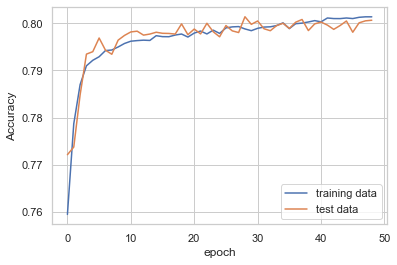

In [89]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.ylabel('Accuracy')
plt.xlabel('epoch')
plt.legend(['training data','test data'],loc='lower right')
plt.show()

In [90]:
print(model3.load_weights('my_best_model'))

# evaluate the model on the training data
yes the same datta we used to train the model

In [91]:
scores=model3.evaluate(X_train,Y_train)
print(model3.metrics_names)
print(scores)
print("\n %s:%.2f%%"%(model3.metrics_names[1],scores[1]*100))

3887/3887 [==============================] - 7s 2ms/step - loss: 0.4205 - accuracy: 0.8009
['loss', 'accuracy']
[0.42045116424560547, 0.8008540272712708]

 accuracy:80.09%


# evaluate on validation set
this is a real test of the model 

we will evaluate the model on the unknown dataset (test dataset)

In [92]:
scores=model3.evaluate(X_test,Y_test)
print("\n %s:%.2f%%"%(model3.metrics_names[1],scores[1]*100))

972/972 [==============================] - 2s 2ms/step - loss: 0.4222 - accuracy: 0.8014

 accuracy:80.14%


# check what the model actualy predict
an exemple of what the model predicted and comparison with the true classes

In [93]:
pred=model3.predict(X_test)
print(confusion_matrix(Y_test, pred.round()))
print(classification_report(Y_test, pred.round()))

972/972 [==============================] - 2s 2ms/step
[[ 9699  4252]
 [ 1923 15215]]
              precision    recall  f1-score   support

           0       0.83      0.70      0.76     13951
           1       0.78      0.89      0.83     17138

    accuracy                           0.80     31089
   macro avg       0.81      0.79      0.79     31089
weighted avg       0.81      0.80      0.80     31089



In [94]:
print(pred[0:5].round())

[[0.]
 [1.]
 [1.]
 [1.]
 [1.]]


In [95]:
print(Y_test[0:5])

50040    0
11637    1
45387    1
47609    0
23622    1
Name: Status, dtype: int32


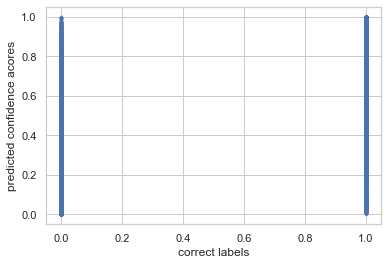

In [96]:
plt.plot(Y_test,pred,'.',alpha=0.3)
plt.xlabel('correct labels')
plt.ylabel('predicted confidence acores')
plt.show()

# is accuracy sufficient to evaluate our model
we can further evaluate the odel using precision, recalll and F1-score

In [97]:
from sklearn.metrics import accuracy_score, precision_score, recall_score,f1_score
accuracy=accuracy_score(Y_test,pred.round())
precision=precision_score(Y_test,pred.round())
recall=recall_score(Y_test,pred.round())
f1score=f1_score(Y_test,pred.round())
print(accuracy*100)
print(precision*100)
print(recall*100)
print(f1score*100)

80.13766927208981
78.15790825499563
88.77932080756214
83.13071984701543


# how can the performance be improved?
increase the number of eporchs

add more layers into the neural networks

increse or decrease the number of rows in the training/test set

In [99]:
print(history.history )

{'loss': [0.4989650845527649, 0.46500450372695923, 0.45036816596984863, 0.44323620200157166, 0.44000375270843506, 0.43793338537216187, 0.4359012544155121, 0.43503668904304504, 0.4335503578186035, 0.4325004816055298, 0.43177056312561035, 0.43084654211997986, 0.4306197464466095, 0.42995303869247437, 0.42917317152023315, 0.4288584291934967, 0.42873722314834595, 0.4278047978878021, 0.42755189538002014, 0.4272277057170868, 0.4270201325416565, 0.4268147349357605, 0.426440954208374, 0.42561548948287964, 0.42560383677482605, 0.425234317779541, 0.4249812960624695, 0.4245811104774475, 0.4245014190673828, 0.42416325211524963, 0.4234195947647095, 0.42351189255714417, 0.42309537529945374, 0.42266297340393066, 0.42247214913368225, 0.42240995168685913, 0.421990305185318, 0.4214661717414856, 0.4214497208595276, 0.4210367202758789, 0.4207960069179535, 0.42045819759368896, 0.4205719828605652, 0.4200827479362488, 0.41992616653442383, 0.4196942150592804, 0.419220894575119, 0.4189830720424652, 0.4188301563

# Visualizing loss and validation loss while training


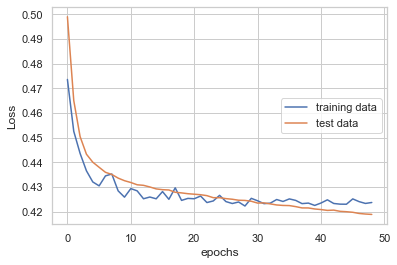

In [100]:
plt.plot(history.history['val_loss'])

plt.plot(history.history['loss'])

plt.xlabel('epochs')

plt.ylabel('Loss')
plt.legend(['training data','test data'],loc='right')

plt.show()

In [101]:
print('les pertes en cas de RL : {}'.format(confusion_matrix(Y_test, pred.round())[1,0]*avgInterest+confusion_matrix(Y_test, pred.round())[0,1]*avgScost))
print('les pertes en cas de AD : {}'.format(confusion_matrix(Y_test, pred.round())[1,1]*avgInterest+confusion_matrix(Y_test, pred.round())[1,1]*avgScost))

les pertes en cas de RL : 985206.8870765878
les pertes en cas de AD : 3780746.957427351


In [102]:
from keras.wrappers.scikit_learn import KerasClassifier

# Pickling the model

In [103]:
# Importing the pickle library

import pickle

# Dumping the model object to save it as DecisionTreeModel.pkl file

pickle.dump(clf,open('DecisionTreeModel.pkl','wb+'))